Telecom X - Análisis de Evasión de Clientes
Has sido contratado como asistente de análisis de datos en Telecom X y formarás parte del proyecto "Churn de Clientes". La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.

Tu desafío será recopilar, procesar y analizar los datos, utilizando Python y sus principales bibliotecas para extraer información valiosa. A partir de tu análisis, el equipo de Data Science podrá avanzar en modelos predictivos y desarrollar estrategias para reducir la evasión

In [16]:
import pandas as pd
import requests
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

##📌 Extracción

1. Cargar los datos directamente desde la API utilizando Python.
2. Convertir los datos a un DataFrame de Pandas para facilitar su manipulación.

In [17]:
responde = requests.get('https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json')
data = responde.json()
datos = pd.DataFrame(data)
datos


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


##🔧Transformacion

1. Explorar las columnas del dataset y verificar sus tipos de datos.
2. Consultar el diccionario para comprender mejor el significado de las variables.
3. Identificar las columnas más relevantes para el análisis de evasión.

In [21]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [23]:
datos = pd.json_normalize(data)
datos

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


 Ajusta los datos para asegurarte de que estén completos y coherentes, preparándolos para las siguientes etapas del análisis.

In [30]:
datos.columns = datos.columns.str.lower()
datos.columns

Index(['customerid', 'churn', 'cliente_genero', 'customer.seniorcitizen',
       'customer.partner', 'customer.dependents', 'cliente_antiguedad',
       'phone.phoneservice', 'phone.multiplelines', 'internet.internetservice',
       'internet.onlinesecurity', 'internet.onlinebackup',
       'internet.deviceprotection', 'internet.techsupport',
       'internet.streamingtv', 'internet.streamingmovies', 'account.contract',
       'account.paperlessbilling', 'account.paymentmethod',
       'account.charges.monthly', 'account.charges.total'],
      dtype='object')

In [31]:
datos = datos.rename(columns={
    'customerid': 'id_cliente',
    'churn': 'dio_de_baja',
    'customer.gender': 'genero',
    'customer.seniorcitizen': 'es_ciudadano_mayor',
    'customer.partner': 'tiene_pareja',
    'customer.dependents': 'tiene_dependientes',
    'customer.tenure': 'meses_antiguedad',
    'phone.phoneservice': 'tiene_servicio_telefono',
    'phone.multiplelines': 'tiene_multiples_lineas',
    'internet.internetservice': 'tipo_servicio_internet',
    'internet.onlinesecurity': 'tiene_seguridad_online',
    'internet.onlinebackup': 'tiene_respaldo_online',
    'internet.deviceprotection': 'tiene_proteccion_dispositivo',
    'internet.techsupport': 'tiene_soporte_tecnico',
    'internet.streamingtv': 'tiene_streaming_tv',
    'internet.streamingmovies': 'tiene_streaming_peliculas',
    'account.contract': 'tipo_contrato',
    'account.paperlessbilling': 'facturacion_sin_papel',
    'account.paymentmethod': 'metodo_pago',
    'account.charges.monthly': 'cargo_mensual',
    'account.charges.total': 'cargo_total'
})
datos.columns

Index(['id_cliente', 'dio_de_baja', 'cliente_genero', 'es_ciudadano_mayor',
       'tiene_pareja', 'tiene_dependientes', 'cliente_antiguedad',
       'tiene_servicio_telefono', 'tiene_multiples_lineas',
       'tipo_servicio_internet', 'tiene_seguridad_online',
       'tiene_respaldo_online', 'tiene_proteccion_dispositivo',
       'tiene_soporte_tecnico', 'tiene_streaming_tv',
       'tiene_streaming_peliculas', 'tipo_contrato', 'facturacion_sin_papel',
       'metodo_pago', 'cargo_mensual', 'cargo_total'],
      dtype='object')

In [32]:
#checkeo de nulos
print (f'La cantidad de nulos:')
datos.isnull().sum()

La cantidad de nulos:


,0
id_cliente,0
dio_de_baja,0
cliente_genero,0
es_ciudadano_mayor,0
tiene_pareja,0
tiene_dependientes,0
cliente_antiguedad,0
tiene_servicio_telefono,0
tiene_multiples_lineas,0
tipo_servicio_internet,0


Ahora que los datos están limpios, es momento de crear la columna "Cuentas_Diarias". Utiliza la facturación mensual para calcular el valor diario, proporcionando una visión más detallada del comportamiento de los clientes a lo largo del tiempo.

In [33]:
datos['cargo_total'] = pd.to_numeric(datos['cargo_total'], errors='coerce')
media = datos['cargo_total'].mean()
datos['cargo_total'] = datos['cargo_total'].fillna(media)

In [35]:
#checkeo de duplicado
print (f'La cantidad de duplicados es:')
datos.duplicated().sum()

La cantidad de duplicados es:


np.int64(0)

In [36]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id_cliente                    7267 non-null   object 
 1   dio_de_baja                   7267 non-null   object 
 2   cliente_genero                7267 non-null   object 
 3   es_ciudadano_mayor            7267 non-null   int64  
 4   tiene_pareja                  7267 non-null   object 
 5   tiene_dependientes            7267 non-null   object 
 6   cliente_antiguedad            7267 non-null   int64  
 7   tiene_servicio_telefono       7267 non-null   object 
 8   tiene_multiples_lineas        7267 non-null   object 
 9   tipo_servicio_internet        7267 non-null   object 
 10  tiene_seguridad_online        7267 non-null   object 
 11  tiene_respaldo_online         7267 non-null   object 
 12  tiene_proteccion_dispositivo  7267 non-null   object 
 13  tie

In [37]:
for col in datos.select_dtypes(include=['object']).columns:
  espacios = datos[col].apply(lambda x: isinstance(x, str) and x.strip() == "")
  if espacios.any():
    print(f"La columna '{col}' contiene {espacios.sum()} espacios en blanco.")
  else:
    print(f"La columna '{col}' no contiene espacios en blanco.")

La columna 'id_cliente' no contiene espacios en blanco.
La columna 'dio_de_baja' contiene 224 espacios en blanco.
La columna 'cliente_genero' no contiene espacios en blanco.
La columna 'tiene_pareja' no contiene espacios en blanco.
La columna 'tiene_dependientes' no contiene espacios en blanco.
La columna 'tiene_servicio_telefono' no contiene espacios en blanco.
La columna 'tiene_multiples_lineas' no contiene espacios en blanco.
La columna 'tipo_servicio_internet' no contiene espacios en blanco.
La columna 'tiene_seguridad_online' no contiene espacios en blanco.
La columna 'tiene_respaldo_online' no contiene espacios en blanco.
La columna 'tiene_proteccion_dispositivo' no contiene espacios en blanco.
La columna 'tiene_soporte_tecnico' no contiene espacios en blanco.
La columna 'tiene_streaming_tv' no contiene espacios en blanco.
La columna 'tiene_streaming_peliculas' no contiene espacios en blanco.
La columna 'tipo_contrato' no contiene espacios en blanco.
La columna 'facturacion_sin_p

In [38]:
for col in datos.select_dtypes(include=['object']).columns:
  datos[col] = datos[col].apply(lambda x: np.nan if isinstance(x, str) and x.strip() == "" else x)
datos = datos.dropna()

In [39]:
datos.isnull().sum()

,0
id_cliente,0
dio_de_baja,0
cliente_genero,0
es_ciudadano_mayor,0
tiene_pareja,0
tiene_dependientes,0
cliente_antiguedad,0
tiene_servicio_telefono,0
tiene_multiples_lineas,0
tipo_servicio_internet,0


In [40]:
datos['cargo_total'] = pd.to_numeric(datos['cargo_total'], errors='coerce')
print(datos['cargo_total'].dtype)

float64


In [41]:
#Ahora calcularemos los gastos diarios y insertaremos la columna
datos['cargo_diario'] = ((datos['cargo_total'] / datos['cliente_antiguedad']) / 30).round(2)
datos.insert(19, 'cargo_diario', datos.pop('cargo_diario'))
datos.columns

Index(['id_cliente', 'dio_de_baja', 'cliente_genero', 'es_ciudadano_mayor',
       'tiene_pareja', 'tiene_dependientes', 'cliente_antiguedad',
       'tiene_servicio_telefono', 'tiene_multiples_lineas',
       'tipo_servicio_internet', 'tiene_seguridad_online',
       'tiene_respaldo_online', 'tiene_proteccion_dispositivo',
       'tiene_soporte_tecnico', 'tiene_streaming_tv',
       'tiene_streaming_peliculas', 'tipo_contrato', 'facturacion_sin_papel',
       'metodo_pago', 'cargo_diario', 'cargo_mensual', 'cargo_total'],
      dtype='object')

##📊 Carga y Analisis

In [42]:
#verificando cuantos clientes cancelaron
datos['dio_de_baja'].value_counts()

,count
dio_de_baja,
No,5174
Yes,1869


In [43]:
#revisando el % de bajas
datos['dio_de_baja'].value_counts(normalize=True).mul(100).round(2)

,proportion
dio_de_baja,
No,73.46
Yes,26.54


In [44]:
#analisis descriptivo
datos.describe(include=[np.number])

,es_ciudadano_mayor,cliente_antiguedad,cargo_diario,cargo_mensual,cargo_total
count,7043.000000,7043.000000,7043.00,7043.000000,7043.000000
mean,0.162147,32.371149,inf,64.761692,2283.296277
std,0.368612,24.559481,NaN,30.090047,2265.000260
min,0.000000,0.000000,0.46,18.250000,18.800000
25%,0.000000,9.000000,1.21,35.500000,402.225000
50%,0.000000,29.000000,2.35,70.350000,1400.550000
75%,0.000000,55.000000,3.01,89.850000,3786.600000
max,1.000000,72.000000,inf,118.750000,8684.800000


In [46]:
#Distribucion y bajas
bajas = datos['dio_de_baja'].value_counts()
bajas

,count
dio_de_baja,
No,5174
Yes,1869


In [47]:
bajas_porcentaje = datos['dio_de_baja'].value_counts(normalize='index'*100).round(2)
bajas_porcentaje

,proportion
dio_de_baja,
No,0.73
Yes,0.27


Text(0.5, 1.0, 'Distribucion de clientes de baja vs. permanentes')

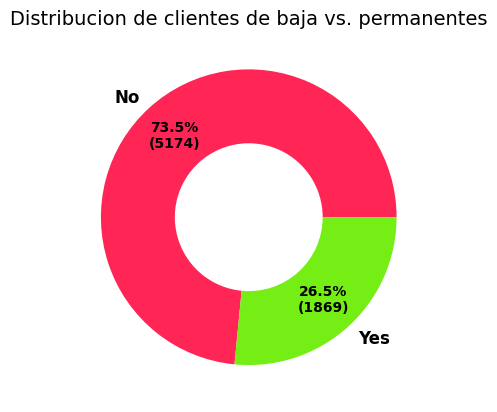

In [82]:
colors = {
    'Yes': '#74ee15',  # Verde neon
    'No': '#ff2555'    # Rojo
}

contador = datos['dio_de_baja'].value_counts()

fig, ax = plt.subplots()
wedges, texts = ax.pie(
    contador.values,
    labels=contador.index,
    colors=[colors.get(k) for k in contador.index],
    wedgeprops=dict(width=0.5)
)

total = sum(contador.values)
for wedge, value in zip(wedges, contador.values):
    ang = (wedge.theta2 + wedge.theta1) / 2.0
    x = np.cos(np.deg2rad(ang)) * 0.75
    y = np.sin(np.deg2rad(ang)) * 0.75
    pct = value / total * 100
    ax.text(x, y, f"{pct:.1f}%\n({value})",
            ha='center', va='center',
            fontsize=10, fontweight='bold')

for text in texts:
    text.set(size=12, weight='bold')


ax.set_title("Distribucion de clientes de baja vs. permanentes", fontsize=14)

In [81]:
genero = pd.crosstab(datos['cliente_genero'], datos['dio_de_baja'], normalize='index') * 100
genero.round(2)

dio_de_baja,No,Yes
cliente_genero,,
Female,73.08,26.92
Male,73.84,26.16


In [51]:
datos['cliente_genero'].value_counts(normalize=True).mul(100).round(2)

,proportion
cliente_genero,
Male,50.48
Female,49.52


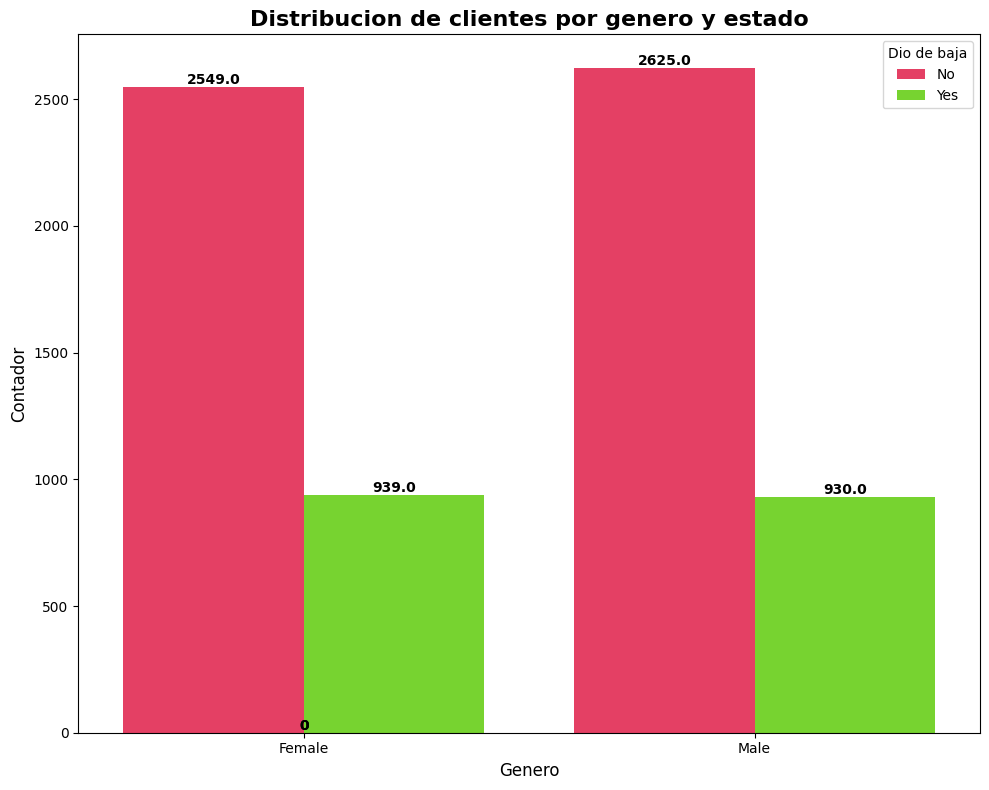

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

colors = {
    'Yes': '#74ee15',  # Verde neon
    'No': '#ff2555'    # Rojo
}

plt.figure(figsize=(10, 8))
ax = sns.countplot(
    data=datos,
    x='cliente_genero',
    hue='dio_de_baja',
    palette=colors
)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom',
                fontsize=10, fontweight='bold')

plt.title("Distribucion de clientes por genero y estado", fontsize=16, fontweight='bold')
plt.xlabel("Genero", fontsize=12)
plt.ylabel("Contador", fontsize=12)

plt.legend(title="Dio de baja")
plt.tight_layout()

In [79]:
tipo_contrato_percent = pd.crosstab(datos['tipo_contrato'], datos['dio_de_baja'], normalize='index') * 100
tipo_contrato_percent.round(2)

dio_de_baja,No,Yes
tipo_contrato,,
Month-to-month,57.29,42.71
One year,88.73,11.27
Two year,97.17,2.83


In [78]:
tipo_contrato = pd.crosstab(datos['tipo_contrato'], datos['dio_de_baja'])
tipo_contrato

dio_de_baja,No,Yes
tipo_contrato,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


<Axes: title={'center': 'Distribucion de clientes dados de baja por Tipo de Contrato'}, ylabel='Yes'>

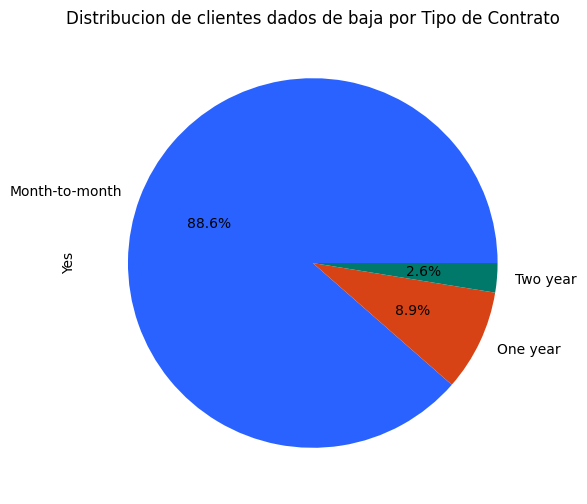

In [63]:
colors = ['#2962FF', '#D84315', '#00796B', '#FDD835', '#7B1FA2']
tipo_contrato['Yes'].plot(kind='pie', autopct='%1.1f%%', figsize=(6,6), title='Distribucion de clientes dados de baja por Tipo de Contrato', colors=colors)

In [77]:
metodo_pago = pd.crosstab(datos['metodo_pago'], datos['dio_de_baja'])
metodo_pago

dio_de_baja,No,Yes
metodo_pago,,
Bank transfer (automatic),1286,258
Credit card (automatic),1290,232
Electronic check,1294,1071
Mailed check,1304,308


In [76]:
metodo_pago_percent = pd.crosstab(datos['metodo_pago'], datos['dio_de_baja'], normalize='index') * 100
metodo_pago_percent.round(2)

dio_de_baja,No,Yes
metodo_pago,,
Bank transfer (automatic),83.29,16.71
Credit card (automatic),84.76,15.24
Electronic check,54.71,45.29
Mailed check,80.89,19.11


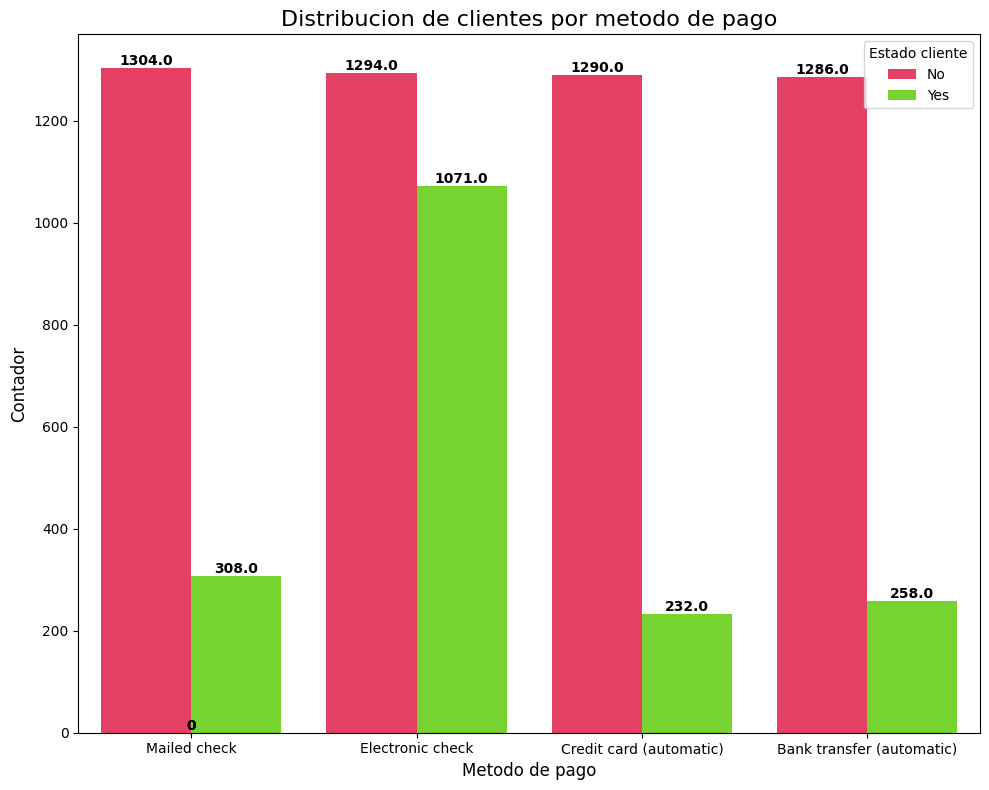

In [75]:
colors = {
   'Yes': '#74ee15',  # Verde neon
    'No': '#ff2555'    # Rojo
}

plt.figure(figsize=(10, 8))
ax = sns.countplot(
    data=datos,
    x='metodo_pago',
    hue='dio_de_baja',
    palette=colors
)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom',
                fontsize=10, fontweight='bold')

plt.title("Distribucion de clientes por metodo de pago", fontsize=16)
plt.xlabel("Metodo de pago", fontsize=12)
plt.ylabel("Contador", fontsize=12)

plt.legend(title="Estado cliente")
plt.tight_layout()

In [74]:
es_ciudadano_mayor = pd.crosstab(datos['es_ciudadano_mayor'], datos['dio_de_baja'])
es_ciudadano_mayor

dio_de_baja,No,Yes
es_ciudadano_mayor,,
0,4508,1393
1,666,476


In [73]:
es_ciudadano_mayor_percent = pd.crosstab(datos['es_ciudadano_mayor'], datos['dio_de_baja'], normalize='index') * 100
es_ciudadano_mayor_percent.round(2)

dio_de_baja,No,Yes
es_ciudadano_mayor,,
0,76.39,23.61
1,58.32,41.68


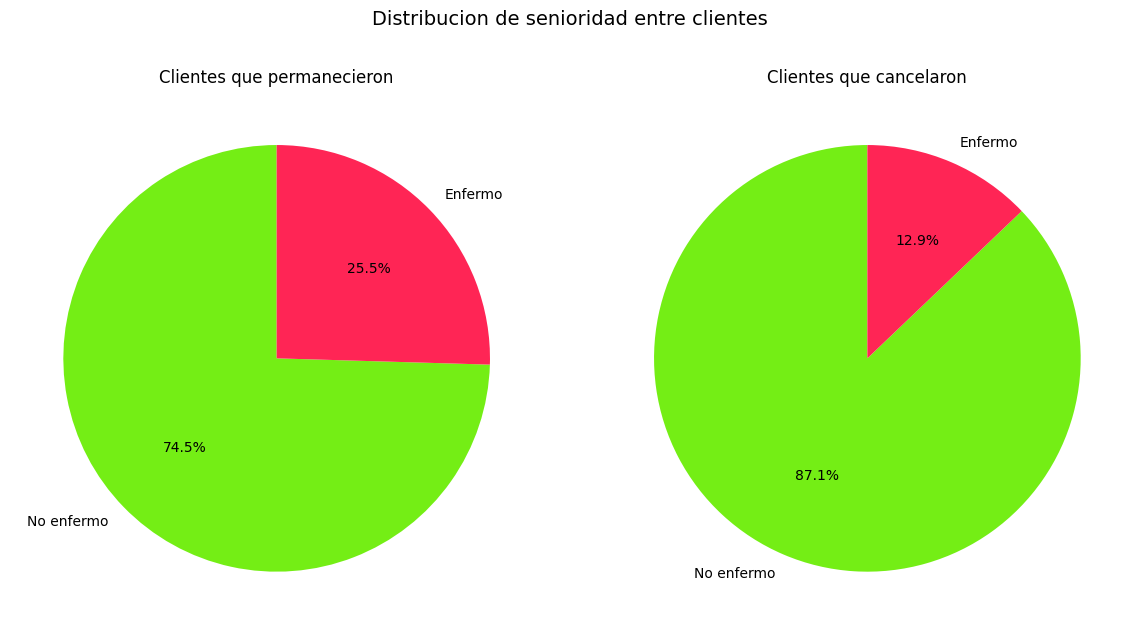

In [71]:
labels = ['No enfermo', 'Enfermo']
contador_permanece = es_ciudadano_mayor['Yes']
contador_baja = es_ciudadano_mayor['No']
colors = ['#74ee15','#ff2555']

fig, axs = plt.subplots(1, 2, figsize=(12,6))

axs[0].pie(contador_permanece, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
axs[0].set_title('Clientes que permanecieron')

axs[1].pie(contador_baja, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
axs[1].set_title('Clientes que cancelaron')

plt.suptitle('Distribucion de senioridad entre clientes', fontsize=14, y=1.05)
plt.tight_layout()
plt.show()

In [72]:
tiene_streaming_peliculas = pd.crosstab(datos['tiene_streaming_peliculas'], datos['dio_de_baja'])
tiene_streaming_peliculas

dio_de_baja,No,Yes
tiene_streaming_peliculas,,
No,1847,938
No internet service,1413,113
Yes,1914,818


In [83]:
tiene_streaming_percent = pd.crosstab(datos['tiene_streaming_peliculas'], datos['dio_de_baja'], normalize='index') * 100
tiene_streaming_percent.round(2)

dio_de_baja,No,Yes
tiene_streaming_peliculas,,
No,66.32,33.68
No internet service,92.60,7.40
Yes,70.06,29.94


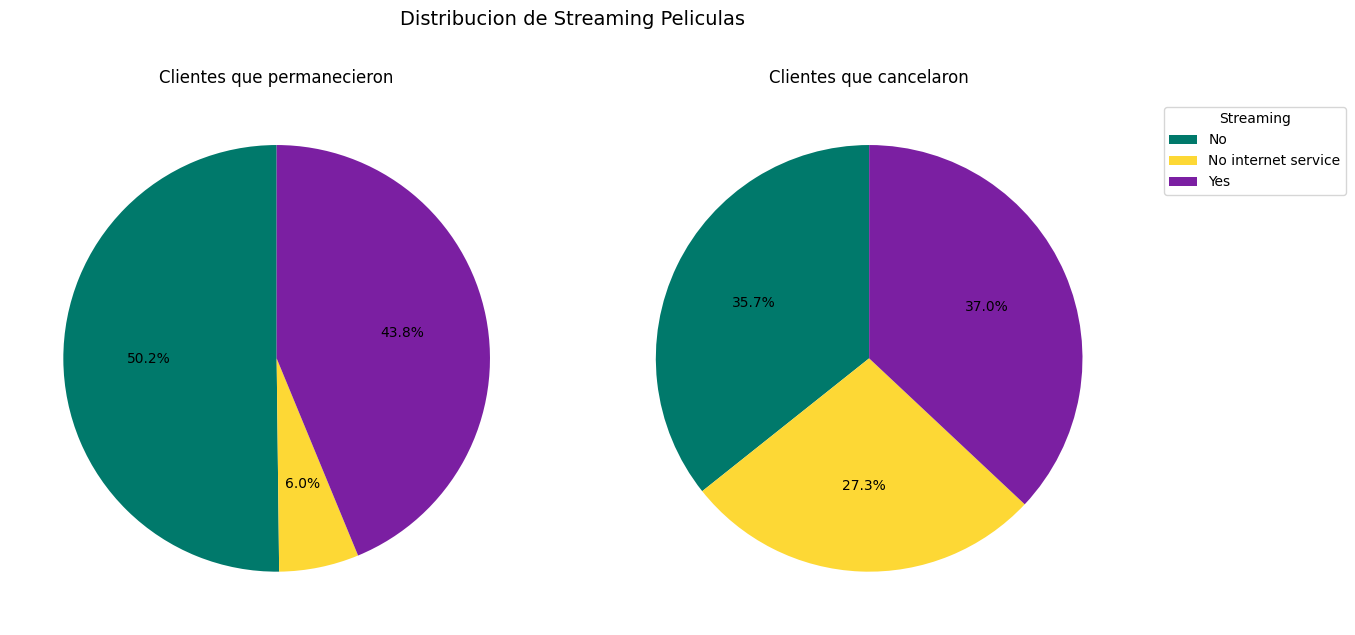

In [97]:
labels = tiene_streaming_peliculas.index.astype(str)
contador_permanece = tiene_streaming_peliculas['Yes']
contador_baja = tiene_streaming_peliculas['No']

colores = ['#00796B', '#FDD835', '#7B1FA2']

fig, axs = plt.subplots(1, 2, figsize=(12,6))

axs[0].pie(contador_permanece, labels=None, autopct='%1.1f%%', startangle=90, colors=colores)
axs[0].set_title('Clientes que permanecieron')

axs[1].pie(contador_baja, labels=None, autopct='%1.1f%%', startangle=90, colors=colores)
axs[1].set_title('Clientes que cancelaron')

fig.legend(labels, loc='upper right', bbox_to_anchor=(1.15, 0.9), title='Streaming')

plt.suptitle('Distribucion de Streaming Peliculas', fontsize=14, y=1.05)
plt.tight_layout()

In [88]:
tiene_pareja = pd.crosstab(datos['tiene_pareja'], datos['dio_de_baja'])
tiene_pareja

dio_de_baja,No,Yes
tiene_pareja,,
No,2441,1200
Yes,2733,669


In [89]:
tiene_pareja_percent = pd.crosstab(datos['tiene_pareja'], datos['dio_de_baja'], normalize='index') * 100
tiene_pareja_percent.round(2)

dio_de_baja,No,Yes
tiene_pareja,,
No,67.04,32.96
Yes,80.34,19.66


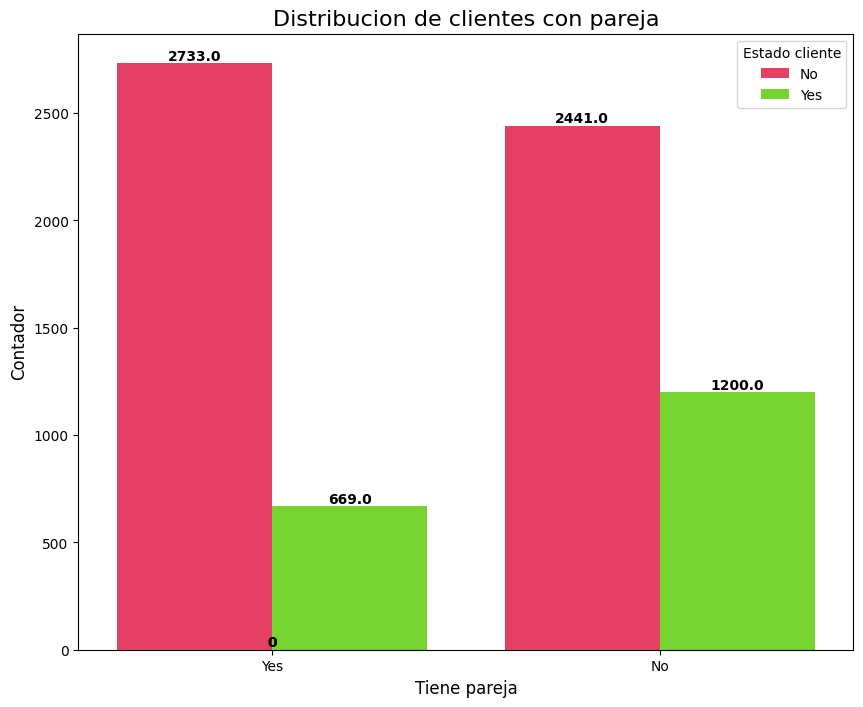

In [93]:
plt.figure(figsize=(10, 8))
ax = sns.countplot(
    data=datos,
    x='tiene_pareja',
    hue='dio_de_baja',
    palette=colors
)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom',
                fontsize=10, fontweight='bold')

plt.title("Distribucion de clientes con pareja", fontsize=16)
plt.xlabel("Tiene pareja", fontsize=12)
plt.ylabel("Contador", fontsize=12)

plt.legend(title="Estado cliente")

In [99]:
tiene_streaming_tv = pd.crosstab(datos['tiene_streaming_tv'], datos['dio_de_baja'])
tiene_streaming_tv

dio_de_baja,No,Yes
tiene_streaming_tv,,
No,1868,942
No internet service,1413,113
Yes,1893,814


In [100]:
tiene_streaming_tv_percent = pd.crosstab(datos['tiene_streaming_tv'], datos['dio_de_baja'], normalize='index') * 100
tiene_streaming_tv_percent.round(2)

dio_de_baja,No,Yes
tiene_streaming_tv,,
No,66.48,33.52
No internet service,92.60,7.40
Yes,69.93,30.07


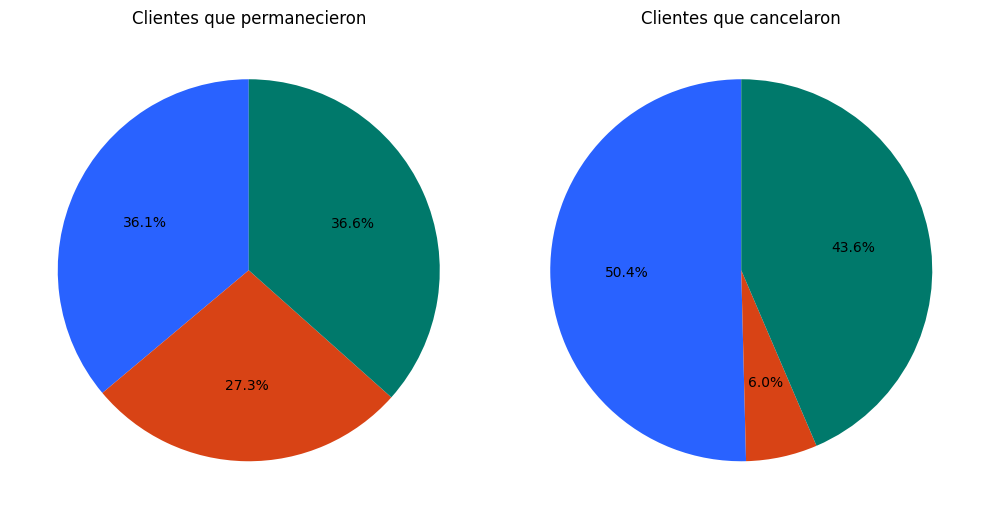

In [118]:
labels = tiene_streaming_tv.index.astype(str)
contador_permanece = tiene_streaming_tv['No']
contador_baja = tiene_streaming_tv['Yes']

fix, axs = plt.subplots(1, 2, figsize=(10,6))

axs[0].pie(contador_permanece, labels=None, autopct='%1.1f%%', startangle=90, colors=colores)
axs[0].set_title('Clientes que permanecieron')

axs[1].pie(contador_baja, labels=None, autopct='%1.1f%%', startangle=90, colors=colores)
axs[1].set_title('Clientes que cancelaron')

fig.legend(labels, loc='upper right', bbox_to_anchor=(1.15, 0.9), title='Tipo de Streaming')

plt.tight_layout()
plt.show()

In [122]:
baja_por_mp = datos[datos['dio_de_baja'] == 'Yes'].groupby('metodo_pago').size()
total_por_mp = datos.groupby('metodo_pago').size()
porcentaje_baja_por_mp = (baja_por_mp / total_por_mp) * 100
porcentaje_baja_por_mp.round(2)

,0
metodo_pago,
Bank transfer (automatic),16.71
Credit card (automatic),15.24
Electronic check,45.29
Mailed check,19.11


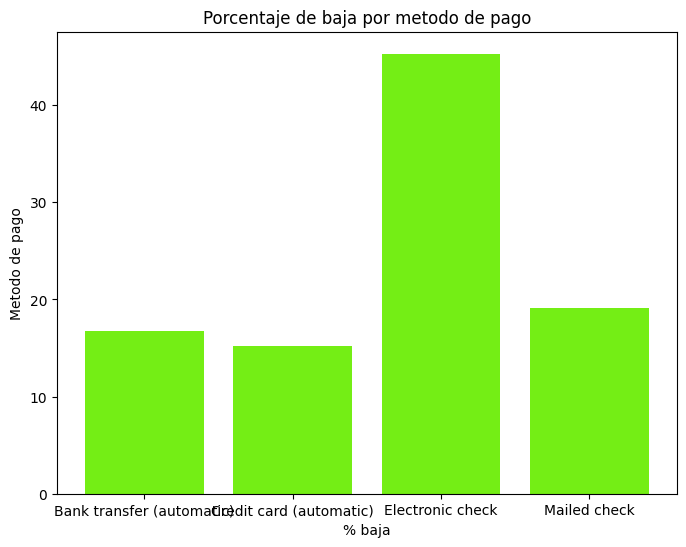

In [125]:
datos_resumen = datos.groupby('metodo_pago')['dio_de_baja'].value_counts(normalize=True).unstack().fillna(0)*100
categorias = datos_resumen.index
valores = datos_resumen['Yes']

fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(categorias, valores, color='#74ee15')

ax.set_xlabel('% baja')
ax.set_ylabel('Metodo de pago')
ax.set_title('Porcentaje de baja por metodo de pago')

plt.show()

In [128]:
datos.groupby('dio_de_baja')['cliente_antiguedad'].describe()

,count,mean,std,min,25%,50%,75%,max
dio_de_baja,,,,,,,,
No,5174.0,37.569965,24.113777,0.0,15.0,38.0,61.0,72.0
Yes,1869.0,17.979133,19.531123,1.0,2.0,10.0,29.0,72.0


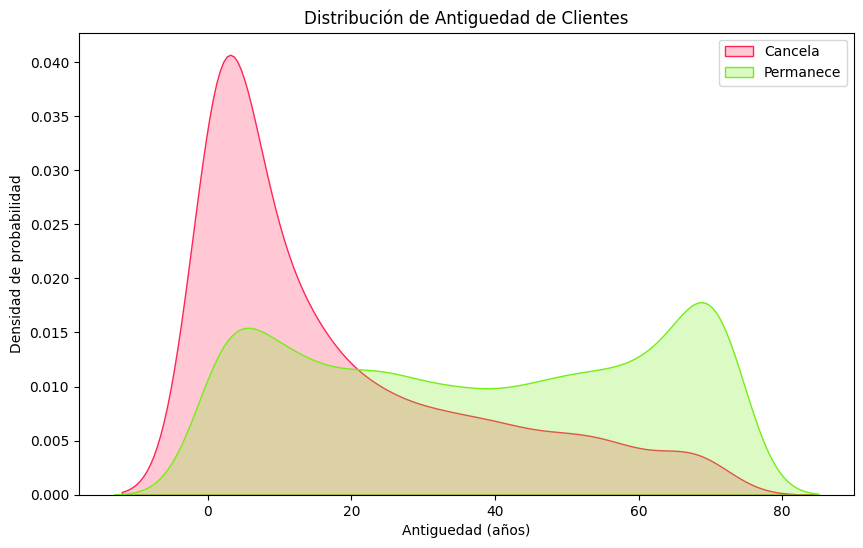

In [132]:
plt.figure(figsize=(10, 6))
sns.kdeplot(datos[datos.dio_de_baja == 'Yes'].cliente_antiguedad, label='Cancela', fill=True, color='#ff2555')
sns.kdeplot(datos[datos.dio_de_baja == 'No'].cliente_antiguedad, label='Permanece', fill=True, color='#74ee15')
plt.title('Distribución de Antiguedad de Clientes')
plt.xlabel('Antiguedad (años)')
plt.ylabel('Densidad de probabilidad')
plt.legend()
plt.show()

In [133]:
datos.groupby('dio_de_baja')['cargo_diario'].describe()

,count,mean,std,min,25%,50%,75%,max
dio_de_baja,,,,,,,,
No,5174.0,inf,NaN,0.46,0.85,2.14,2.93,inf
Yes,1869.0,2.481006,0.832083,0.47,1.93,2.64,3.13,4.05


In [134]:
#tratamiento de valores en columna cargo diario
datos['cargo_diario'] = datos['cargo_diario'].replace([np.inf, -np.inf], np.nan)
datos['cargo_diario'] = datos['cargo_diario'].fillna(0)

In [135]:
datos.groupby('dio_de_baja')['cargo_diario'].describe()

,count,mean,std,min,25%,50%,75%,max
dio_de_baja,,,,,,,,
No,5174.0,2.039287,1.041261,0.00,0.84,2.13,2.92,4.02
Yes,1869.0,2.481006,0.832083,0.47,1.93,2.64,3.13,4.05


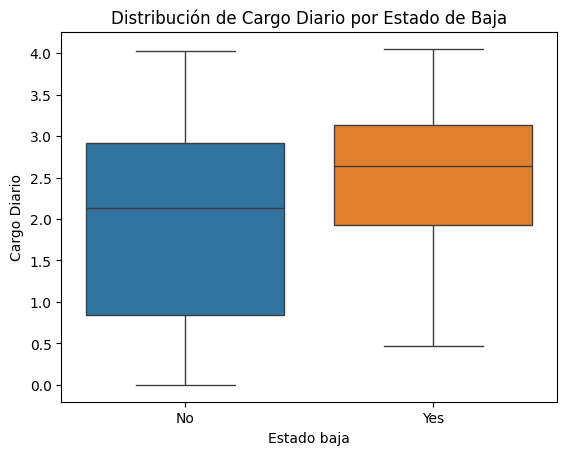

In [138]:
sns.boxplot(x='dio_de_baja', y='cargo_diario', data=datos, hue='dio_de_baja')
plt.title('Distribución de Cargo Diario por Estado de Baja')
plt.xlabel('Estado baja')
plt.ylabel('Cargo Diario')
plt.show()

In [139]:
datos.groupby('dio_de_baja')['cargo_mensual'].describe()

,count,mean,std,min,25%,50%,75%,max
dio_de_baja,,,,,,,,
No,5174.0,61.265124,31.092648,18.25,25.10,64.425,88.4,118.75
Yes,1869.0,74.441332,24.666053,18.85,56.15,79.650,94.2,118.35


Text(0, 0.5, 'Cargo Mensual')

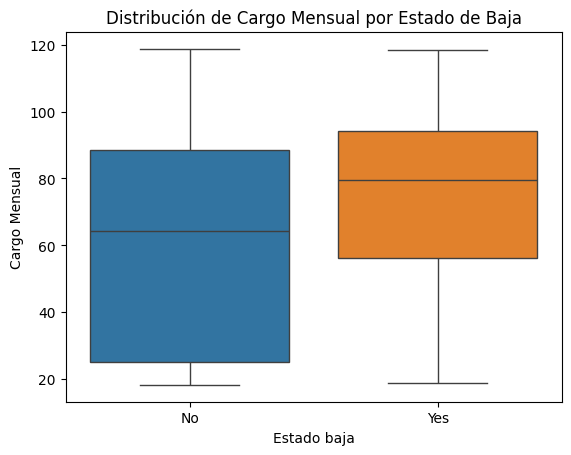

In [140]:
sns.boxplot(x='dio_de_baja', y='cargo_mensual', data=datos, hue='dio_de_baja')
plt.title('Distribución de Cargo Mensual por Estado de Baja')
plt.xlabel('Estado baja')
plt.ylabel('Cargo Mensual')

In [141]:
datos.groupby('dio_de_baja')['cargo_total'].describe()

,count,mean,std,min,25%,50%,75%,max
dio_de_baja,,,,,,,,
No,5174.0,2554.760104,2327.013364,18.80,579.575,1689.175,4262.85,8672.45
Yes,1869.0,1531.796094,1890.822994,18.85,134.500,703.550,2331.30,8684.80


Text(0, 0.5, 'Cargo Total')

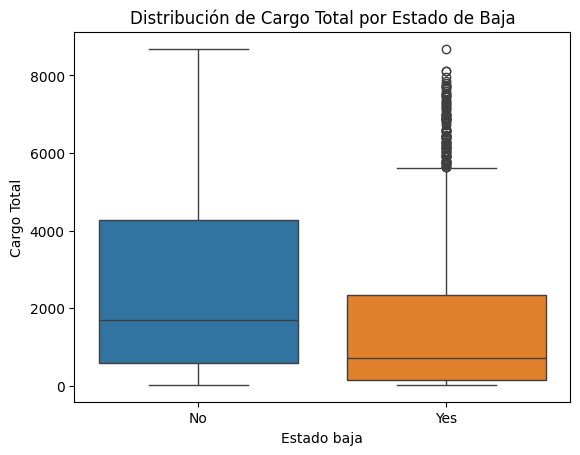

In [142]:
sns.boxplot(x='dio_de_baja', y='cargo_total', data=datos, hue='dio_de_baja')
plt.title('Distribución de Cargo Total por Estado de Baja')
plt.xlabel('Estado baja')
plt.ylabel('Cargo Total')

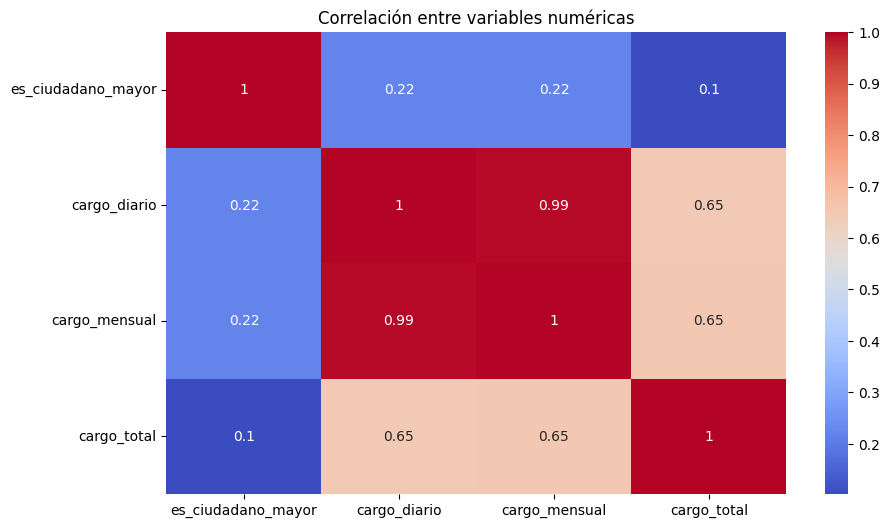

In [143]:
columnas_numericas = datos.select_dtypes(include=[np.number]).columns
columnas_numericas = columnas_numericas.drop('cliente_antiguedad')
plt.figure(figsize=(10, 6))
sns.heatmap(datos[columnas_numericas].corr(), annot=True, cmap='coolwarm')
plt.title('Correlación entre variables numéricas')
plt.show()

##📄Informe final


🔹 Introducción: Explica el objetivo del análisis y el problema de evasión de clientes (Churn).

🔹 Limpieza y Tratamiento de Datos: Describe los pasos realizados para importar, limpiar y procesar los datos.

🔹 Análisis Exploratorio de Datos: Presenta los análisis realizados, incluyendo gráficos y visualizaciones para identificar patrones.

🔹 Conclusiones e Insights: Resume los principales hallazgos y cómo estos datos pueden ayudar a reducir la evasión.

🔹 Recomendaciones: Ofrece sugerencias estratégicas basadas en tu análisis.

##Intro

Este informe presenta los principales hallazgos del análisis de la rotación de clientes de Telecom X. El objetivo es entender por qué los clientes están cancelando sus servicios, permitiendo a la empresa desarrollar estrategias efectivas para retenerlos.

Como analista de datos, mi trabajo se centró en explorar y visualizar los datos para identificar patrones y comportamientos clave que explican este fenómeno. Las conclusiones de este análisis son la base para que el equipo de Data Science construya modelos predictivos y proponga acciones concretas para reducir la tasa de abandono.

##Limpieza y Tratamiento de Datos

Para garantizar la fiabilidad del análisis, los datos fueron sometidos a un proceso de ETL (Extracción, Transformación y Carga).

Durante esta fase, se realizaron los siguientes pasos clave:

>Normalización y limpieza: Se estandarizaron los datos para una mejor visualización, y se eliminaron valores nulos, vacíos y duplicados para asegurar la precisión del análisis.

>Renombramiento: Las columnas se renombraron a términos más claros y se estandarizaron a minúsculas, lo que facilitó su uso y comprensión en todo el proyecto.

Gracias a este tratamiento, el conjunto de datos está ahora limpio, consistente y listo para la fase de análisis exploratorio.

##Análisis Exploratorio

El análisis inicial de los datos revela que el **26.54% ** de los clientes (1,869 en total) ha cancelado su servicio, una cifra que destaca el problema de la rotación de clientes.

A través de la exploración de datos, hemos identificado patrones clave en el comportamiento de los clientes que se van:

>Antiguedad: Los clientes que cancelan tienen una antigüedad promedio de solo 17 meses, un período significativamente menor que los 37 meses de los clientes leales.

>Contrato y Pago: La mayoría de los abandonos están ligados a contratos "Month-to-Month" (42.71% de los casos), y casi la mitad de ellos pagaba con cheque electrónico (45.29%).

>Servicios y Demografía: Se observa una fuerte correlación entre la cancelación y el uso de servicios de streaming (30% de los que se fueron los usaban). Además, los clientes que cancelan suelen ser no mayores y sin pareja.

## Conclusiones

El análisis nos permite construir un perfil claro del cliente con alto riesgo de abandono:

>Perfil de Riesgo: El cliente con mayor probabilidad de cancelar tiene un contrato de mes a mes, utiliza cheque electrónico, no es una persona mayor, no tiene pareja y usa servicios de streaming. Este perfil se da de baja, en promedio, después de 17 meses.

Esta información es crucial para entender las causas subyacentes de la rotación y puede servir como base para el desarrollo de modelos predictivos y estrategias de retención. Los datos sugieren que la flexibilidad de los contratos de mes a mes, combinada con ciertas formas de pago y servicios específicos, son indicadores clave de que un cliente podría estar insatisfecho o en riesgo.

## Recomendaciones

Basado en este análisis, se proponen las siguientes sugerencias estratégicas para reducir la rotación de clientes:

>Incentivar Contratos a Largo Plazo: Crear ofertas atractivas para que los clientes de "Month-to-Month" cambien a contratos de 1 o 2 años. Por ejemplo, ofrecer descuentos en la tarifa mensual o servicios adicionales.

>Modernizar las Opciones de Pago: Promover el uso de métodos de pago más convenientes y seguros que no sean el cheque electrónico. Esto puede incluir beneficios por domiciliación bancaria o pago con tarjeta.

>Análisis Específico de Servicios de Streaming: Investigar más a fondo la experiencia de los usuarios de streaming. Es posible que existan problemas de servicio o precios que estén impulsando el abandono en este segmento.

>Campañas de Retención Dirigidas: Utilizar el perfil de riesgo identificado para lanzar campañas personalizadas de retención, ofreciendo atención especial o beneficios a los clientes que se ajustan a las características de alto riesgo.